In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('gambung_tea.xlsx')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14040 entries, 0 to 14039
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   14040 non-null  int64  
 1   MQ3          14040 non-null  int64  
 2   TGS822       14040 non-null  int64  
 3   TGS2602      14040 non-null  int64  
 4   MQ5          14040 non-null  int64  
 5   MQ138        14040 non-null  int64  
 6   TGS2620      14040 non-null  int64  
 7   Score        14040 non-null  float64
 8   Class        14040 non-null  object 
 9   Sampling_id  14040 non-null  object 
dtypes: float64(1), int64(7), object(2)
memory usage: 1.1+ MB


In [3]:
X = data.iloc[:, 1:7]
y = data.iloc[:, 8]
y = y.replace({'Cacat Mutu': 'Defect', 'Baik': 'Good'})

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model = SVC(kernel='linear', probability=True)

# Perform cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Average cross-validation score:", cv_scores.mean())

# Fit the model and make predictions
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Cross-validation scores: [0.70600203 0.70244151 0.73397762 0.69821883 0.70229008]
Average cross-validation score: 0.7085860131135149


In [5]:
# Calculate the accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.7148622981956315


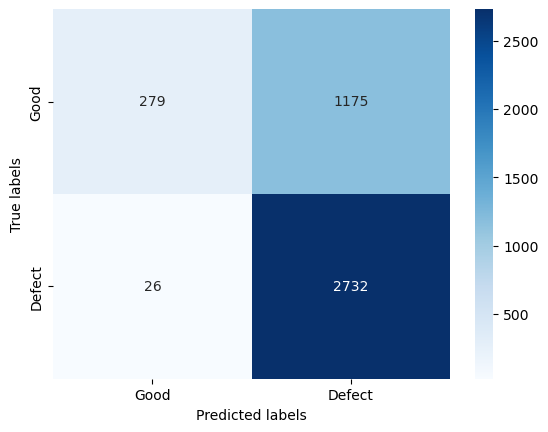

In [6]:
class_names = ['Good', 'Defect']
sns.heatmap(conf_matrix, annot=True, fmt='.4g', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()